<a href="https://colab.research.google.com/github/cartman12/DS-Unit-2-Regression-1/blob/master/module3-doing-linear-regression/Mohamad%20Ali%20Nasser%20-%20%20doing-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initital Data

In [0]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [0]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [0]:
"""
Fatalities denotes the cumulative number of American military
fatalities per millions of US population the in Korea, Vietnam,
Iraq and Afghanistan wars during the presidential terms
preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and
2012 elections.

http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf
"""

columns = ['Year','US Military Fatalities per Million']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

In [285]:
df = votes.merge(growth).merge(deaths)
df.shape

(17, 6)

In [0]:
https://github.com/cartman12/DS-Unit-2-Regression-1/blob/master/module3-doing-linear-regression/Net%20private%20saving%20usa.csv

## Import USA Private Saving since 1948 and World export since 1960

In [0]:
world_export = pd.read_csv( 'https://raw.githubusercontent.com/cartman12/DS-Unit-2-Regression-1/master/module3-doing-linear-regression/world%20export%201970%20to%202018.csv')
usa_private_saving = pd.read_csv('https://raw.githubusercontent.com/cartman12/DS-Unit-2-Regression-1/master/module3-doing-linear-regression/Net%20private%20saving%20usa.csv')


### Wrangling USA Private Saving

In [181]:
world_export.dtypes.head()

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
dtype: object

In [182]:
usa_private_saving.head()

,DATE,W202RC1Q027SBEA
0,1947-01-01,16.486
1,1947-04-01,15.711
2,1947-07-01,19.911
3,1947-10-01,18.271
4,1948-01-01,23.570


In [277]:
usa_private_saving.dtypes


Year                int64
Private_saving    float64
dtype: object

In [0]:
usa_private_saving = usa_private_saving.rename(columns={'DATE':'Year', 'W202RC1Q027SBEA':'Private_saving'})
usa_private_saving['Year'] = pd.to_datetime(usa_private_saving['Year'])

In [0]:
usa_private_saving['Year'] = usa_private_saving['Year'].dt.year



In [0]:
Years = ['1952',
        '1956',
        '1960',
        '1964',
        '1968',
        '1972',
        '1976',
        '1980',
        '1984',
        '1988',
        '1992',
        '1996',
        '2000',
        '2004',
        '2008',
        '2012', 
        '2016']

In [193]:
usa_private_saving.head()

,Year,Private_saving
5,1952,158.050
9,1956,204.105
13,1960,225.528
17,1964,346.559
21,1968,446.031


In [0]:
usa_private_saving = pd.DataFrame(usa_private_saving.groupby('Year')['Private_saving'].sum())

In [0]:
usa_private_saving = usa_private_saving.reset_index()

In [0]:
usa_private_saving = usa_private_saving[usa_private_saving['Year'].isin(Years)]

In [194]:
usa_private_saving.shape, df.shape

((17, 2), (17, 6))

### Wrangling World export - Choosing t-1

In [0]:
# https://unstats.un.org/unsd/trade/imts/Historical%20data%201900-1960.pdf for 1959, 1955 and 1951

In [0]:
cols = list(map(int, Years))

In [0]:
cols[:] = [x - 1 for x in cols]

In [0]:
cols = list(map(str, cols))

In [0]:
cols.append('Country Name')

In [0]:
cols

In [0]:
world_export = pd.read_csv( 'https://raw.githubusercontent.com/cartman12/DS-Unit-2-Regression-1/master/module3-doing-linear-regression/world%20export%201951%20to%202018.csv', usecols=cols)

In [302]:
world_export.head()

,Export,Year
1,1.4876e+10,1952
2,1.5398e+10,1956
3,1.7393e+10,1960
4,3.11e+10,1964
5,4.35e+10,1968


In [0]:
world_export = world_export[world_export['Country Name'] == 'United States']

In [0]:
world_export = world_export.T
world_export = world_export.reset_index().drop([0])
world_export.columns = ['Year-1', 'Export']

In [0]:
world_export['Year-1'] = world_export['Year-1'].astype(int)

In [0]:
world_export['Year'] = world_export['Year-1'] +  1

In [0]:
world_export = world_export.drop('Year-1', axis =1)


In [279]:
world_export.dtypes

Year       int64
Export    object
dtype: object

In [263]:
world_export.shape, usa_private_saving.shape, df.shape

((17, 2), (17, 2), (17, 6))

In [0]:
price_index = pd.read_csv('https://raw.githubusercontent.com/cartman12/DS-Unit-2-Regression-1/master/module3-doing-linear-regression/Price%20index.csv')

In [0]:
def FREDdata(df, column_name, Years):
  df = df.rename(columns={'DATE':'Year', 'CPIAUCSL': column_name})
  df['Year'] = pd.to_datetime(df['Year'])
  df['Year'] = df['Year'].dt.year
  df = pd.DataFrame(df.groupby('Year')[column_name].sum())
  df = df.reset_index()
  df = df[df['Year'].isin(Years)]
  return df


In [0]:
price_index = FREDdata(price_index, 'price_index', Years)

In [0]:
price_index.head()

### Lets merge and perform some linear magic

In [265]:
df.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million
0,1952,Stevenson,Eisenhower,44.60,2.40,190
1,1956,Eisenhower,Stevenson,57.76,2.89,0
2,1960,Nixon,Kennedy,49.91,0.85,0
3,1964,Johnson,Goldwater,61.34,4.21,1
4,1968,Humphrey,Nixon,49.60,3.02,146


In [278]:
df.dtypes

Year                                           int64
Incumbent Party Candidate                     object
Other Candidate                               object
Incumbent Party Vote Share                   float64
Average Recent Growth in Personal Incomes    float64
US Military Fatalities per Million             int64
dtype: object

In [0]:
df = df.merge(world_export).merge(usa_private_saving).merge(price_index)

In [388]:
df.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Export,Private_saving,price_index
0,1952,Stevenson,Eisenhower,44.60,2.40,190,1.4876e+10,158.050,318.80
1,1956,Eisenhower,Stevenson,57.76,2.89,0,1.5398e+10,204.105,326.29
2,1960,Nixon,Kennedy,49.91,0.85,0,1.7393e+10,225.528,355.02
3,1964,Johnson,Goldwater,61.34,4.21,1,3.11e+10,346.559,372.46
4,1968,Humphrey,Nixon,49.60,3.02,146,4.35e+10,446.031,417.50


In [0]:
target = 'Incumbent Party Vote Share'

mean_baseline = [df[target].mean()] * len(df)
MEA_mean = (df[target]-mean_baseline).abs().mean()

In [312]:
MEA_mean

4.463806228373703

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [0]:
model = LinearRegression()

In [0]:
features = ['Average Recent Growth in Personal Incomes', 'US Military Fatalities per Million', 'Export', 'Private_saving']

In [0]:
X = df[features]
y = df[target]

In [372]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [373]:
y_pred = model.predict(X)
mean_absolute_error(y, y_pred)

1.3240274058375539

In [0]:
def MEA(df, features):
  X = df[features]
  y = df['Incumbent Party Vote Share']
  
  model = LinearRegression()
  model.fit(X,y)
  y_pred = model.predict(X)
  MEA = mean_absolute_error(y, y_pred)
  return MEA

In [395]:
MEA(df, ['Average Recent Growth in Personal Incomes', 'US Military Fatalities per Million', 'price_index'] )

1.396052896459876

In [396]:
MEA(df, ['Average Recent Growth in Personal Incomes', 'US Military Fatalities per Million', 'Private_saving', 'price_index'] )

1.2003840149435752

In [401]:
MEA(df, ['Average Recent Growth in Personal Incomes', 'US Military Fatalities per Million', 'Export', 'Private_saving', 'price_index'] )

1.0485851123221417

### Split train test

In [0]:
def MEAsplit(df, features, year)

In [0]:
def MAEsplit(df, features, year, ex): 
  if '!' in ex:
    train = df.query('Year != ' + year)
    test  = df.query('Year == ' + year)
  else:
    train = df.query('Year < ' + year)
    test  = df.query('Year >= ' + year)
  X_train = train[features] 
  y_train = train[target]
  X_test  = test[features]
  y_test  = test[target]
  
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  MAE = mean_absolute_error(y_test, y_pred)
  return [MAE, y_pred]
  

In [471]:
Years

['1952',
 '1956',
 '1960',
 '1964',
 '1968',
 '1972',
 '1976',
 '1980',
 '1984',
 '1988',
 '1992',
 '1996',
 '2000',
 '2004',
 '2008',
 '2012',
 '2016']

In [480]:
MAEsplit(df, ['Average Recent Growth in Personal Incomes', 'US Military Fatalities per Million', 'Export', 'Private_saving', 'price_index'], i, "!")[1]

array([45.10794593])

In [0]:
import numpy as np

In [492]:
MAEs = []
y_preds = []
for i in Years:
  MAE = MAEsplit(df, ['Average Recent Growth in Personal Incomes', 'US Military Fatalities per Million', 'Export', 'Private_saving', 'price_index'], i, "!")[0]
  y_pred = MAEsplit(df, ['Average Recent Growth in Personal Incomes', 'US Military Fatalities per Million', 'Export', 'Private_saving', 'price_index'], i, "!")[1]
  MAEs.append(MAE)
  y_preds = np.append(y_preds, y_pred)
  print('MAE on the test data for the year', i, 'is:', MAE)
print('Leave one out prediciton Total MAE:', pd.Series(MAEs).mean())

MAE on the test data for the year 1952 is: 0.5079459300765095
MAE on the test data for the year 1956 is: 0.6060943034656461
MAE on the test data for the year 1960 is: 0.5553372198528805
MAE on the test data for the year 1964 is: 0.6236968281402042
MAE on the test data for the year 1968 is: 0.34684081338294703
MAE on the test data for the year 1972 is: 2.730844386784298
MAE on the test data for the year 1976 is: 2.162449642193266
MAE on the test data for the year 1980 is: 0.9539298138119534
MAE on the test data for the year 1984 is: 0.7088083613680567
MAE on the test data for the year 1988 is: 0.14134851138035032
MAE on the test data for the year 1992 is: 1.1658713683324464
MAE on the test data for the year 1996 is: 5.9743880110960035
MAE on the test data for the year 2000 is: 4.938147178344494
MAE on the test data for the year 2004 is: 0.701474466990355
MAE on the test data for the year 2008 is: 1.9177225126432234
MAE on the test data for the year 2012 is: 1.8676197434706836
MAE on the

In [493]:
y_preds

array([45.10794593, 57.1539057 , 50.46533722, 61.96369683, 49.25315919,
       59.05915561, 51.11244964, 45.65392981, 59.87880836, 53.79865149,
       47.71587137, 48.76561199, 55.20814718, 51.94147447, 44.40227749,
       53.86761974, 48.26575751])

In [0]:
df['MAE'] = MAEs

In [0]:
df['Predicted Incumbent Party Vote Share'] = y_preds

In [499]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Export,Private_saving,price_index,MAE,Predicted Incumbent Party Vote Share
0,1952,Stevenson,Eisenhower,44.60,2.40,190,1.4876e+10,158.050,318.800,0.507946,45.107946
1,1956,Eisenhower,Stevenson,57.76,2.89,0,1.5398e+10,204.105,326.290,0.606094,57.153906
2,1960,Nixon,Kennedy,49.91,0.85,0,1.7393e+10,225.528,355.020,0.555337,50.465337
3,1964,Johnson,Goldwater,61.34,4.21,1,3.11e+10,346.559,372.460,0.623697,61.963697
4,1968,Humphrey,Nixon,49.60,3.02,146,4.35e+10,446.031,417.500,0.346841,49.253159
5,1972,Nixon,McGovern,61.79,3.62,0,6.2964e+10,638.254,501.700,2.730844,59.059156
6,1976,Ford,Carter,48.95,1.08,2,1.39e+11,897.691,683.200,2.162450,51.112450
7,1980,Carter,Reagan,44.70,-0.39,0,2.3e+11,1185.528,988.600,0.953930,45.653930
8,1984,Reagan,Mondale,59.17,3.86,0,2.77e+11,1919.581,1247.200,0.708808,59.878808
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,3.64e+11,1853.574,1419.300,0.141349,53.798651


<Figure size 1152x504 with 0 Axes>

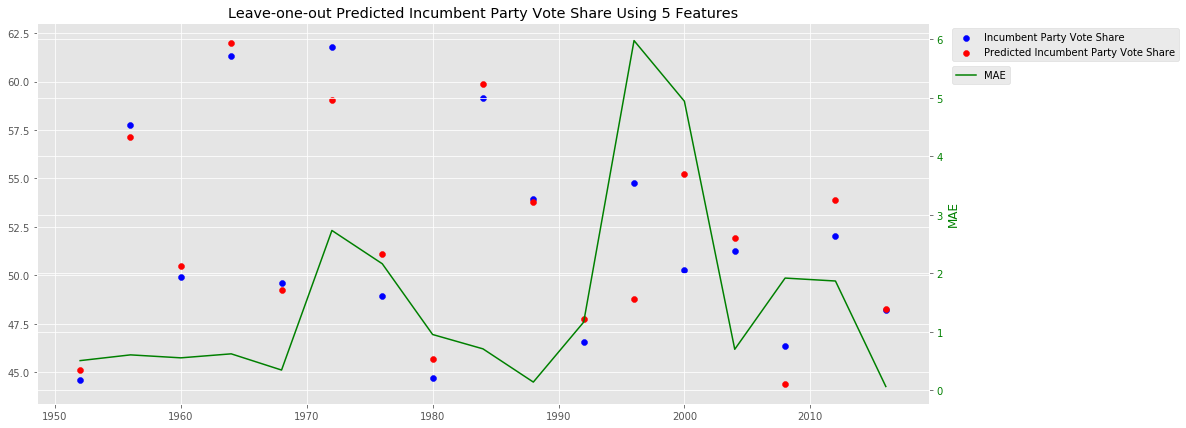

In [546]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

x_year =  df['Year']
figure(num=None, figsize = (16,7))

fig, ax1 = plt.subplots(figsize = (16,7))

ax1.scatter( x_year,df['Incumbent Party Vote Share'], color = 'blue')
ax1.scatter(x_year, df['Predicted Incumbent Party Vote Share'], color = 'red')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax2.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(x_year, df['MAE'], color = 'green')
ax2.set_ylabel('MAE',color='green')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.9))
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Leave-one-out Predicted Incumbent Party Vote Share Using 5 Features')
plt.show()